IMPORT THE Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

LOad the data

In [2]:
df=pd.read_csv('data/stud.csv')

the top 5 rows

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


SHAPE

In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Handle Missing Values and check duplicates, no of unique values of each Column, and statistics

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


EXPLORING DATA

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:     ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:     ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:     ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:     ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:      ['none' 'completed']


In [12]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


 Columns for total score and average 

In [13]:
df['tscore']=df['math_score']+df['reading_score']+df['writing_score']
df['avg']=df['tscore']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,tscore,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full=df[df['reading_score']==100]['avg'].count()
writing_full=df[df['writing_score']==100]['avg'].count()
math_full=df[df['math_score']==100]['avg'].count()
print('No of students with full score in reading : ',reading_full)  
print('No of students with full score in writing : ',writing_full)
print('No of students with full score in math : ',math_full)

No of students with full score in reading :  17
No of students with full score in writing :  14
No of students with full score in math :  7


In [15]:
reading_less_20=df[df['reading_score']<20]['avg'].count()
writing_less_20=df[df['writing_score']<20]['avg'].count()
math_less_20=df[df['math_score']<20]['avg'].count()
print('No of students with less than 20 score in reading : ',reading_less_20)
print('No of students with less than 20 score in writing : ',writing_less_20)
print('No of students with less than 20 score in math : ',math_less_20)

No of students with less than 20 score in reading :  1
No of students with less than 20 score in writing :  3
No of students with less than 20 score in math :  4


VISUALIZATION

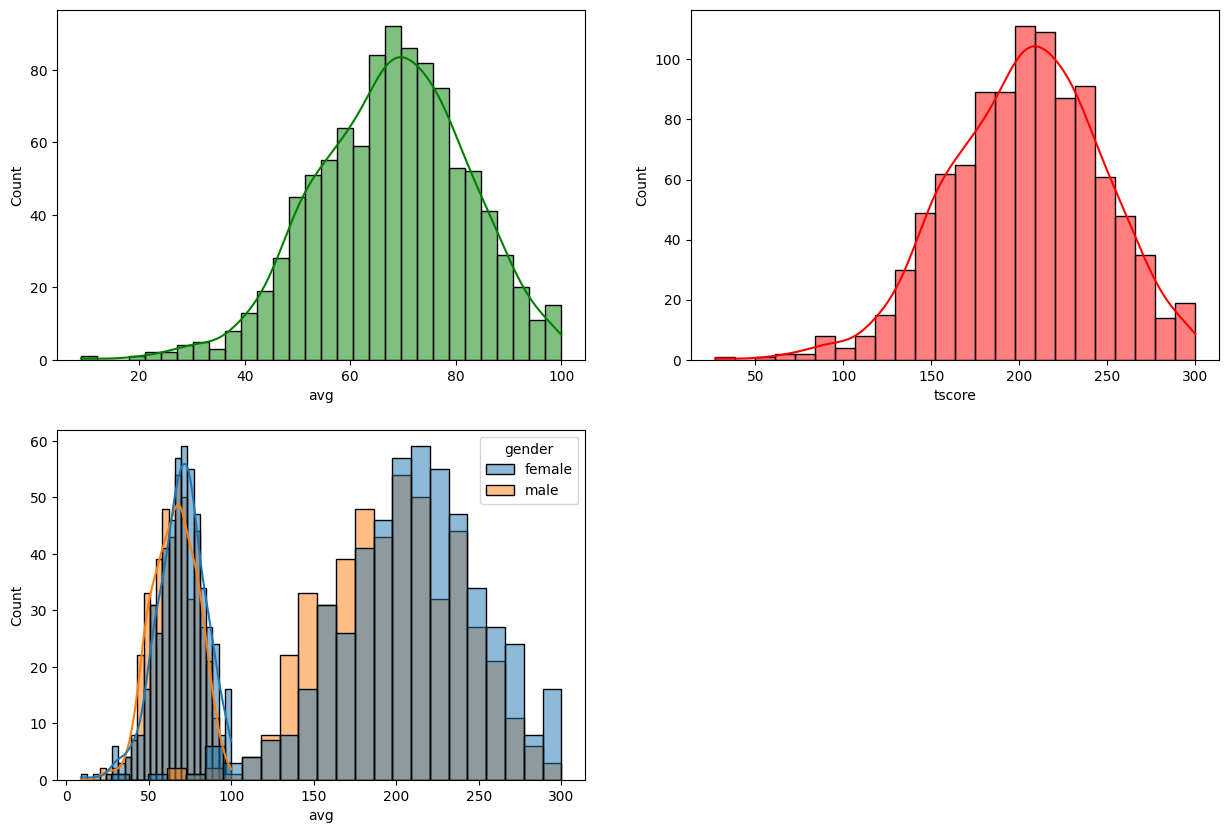

In [16]:
# HISTOGRAM AND KDE
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data=df, x='avg', bins=30, kde=True, color='g', ax=axs[0, 0])
sns.histplot(data=df, x='tscore', kde=True, color='r', ax=axs[0, 1])
sns.histplot(data=df, x='avg', kde=True, color='b', hue='gender', ax=axs[1, 0])
sns.histplot(data=df, x='tscore', color='y', hue='gender', ax=axs[1, 0])
axs[1, 1].axis('off') 
plt.show()


Insights
FEmale students tend to perform well then male students 

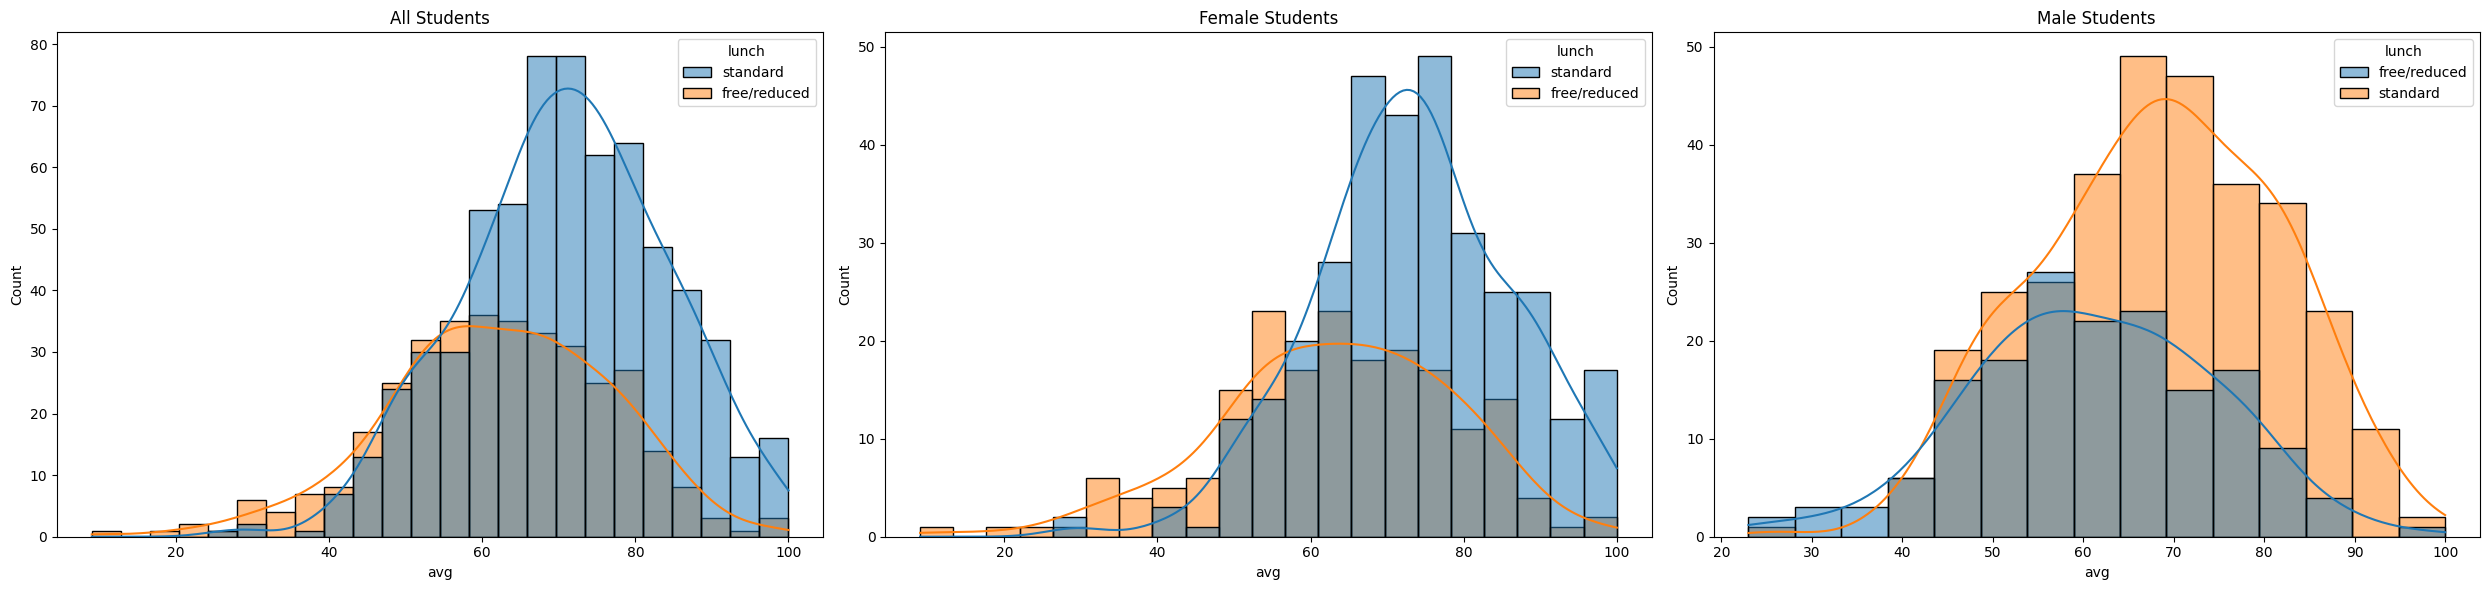

In [17]:
plt.figure(figsize=(25,6))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='avg', kde=True, hue='lunch')
plt.title('All Students')

plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender=='female'], x='avg', kde=True, hue='lunch')
plt.title('Female Students')

plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender=='male'], x='avg', kde=True, hue='lunch')
plt.title('Male Students')

plt.tight_layout()
plt.show()

Insights:
Standard lunch students tend to perform better than free/reduced lunch , whether it a female or male. 


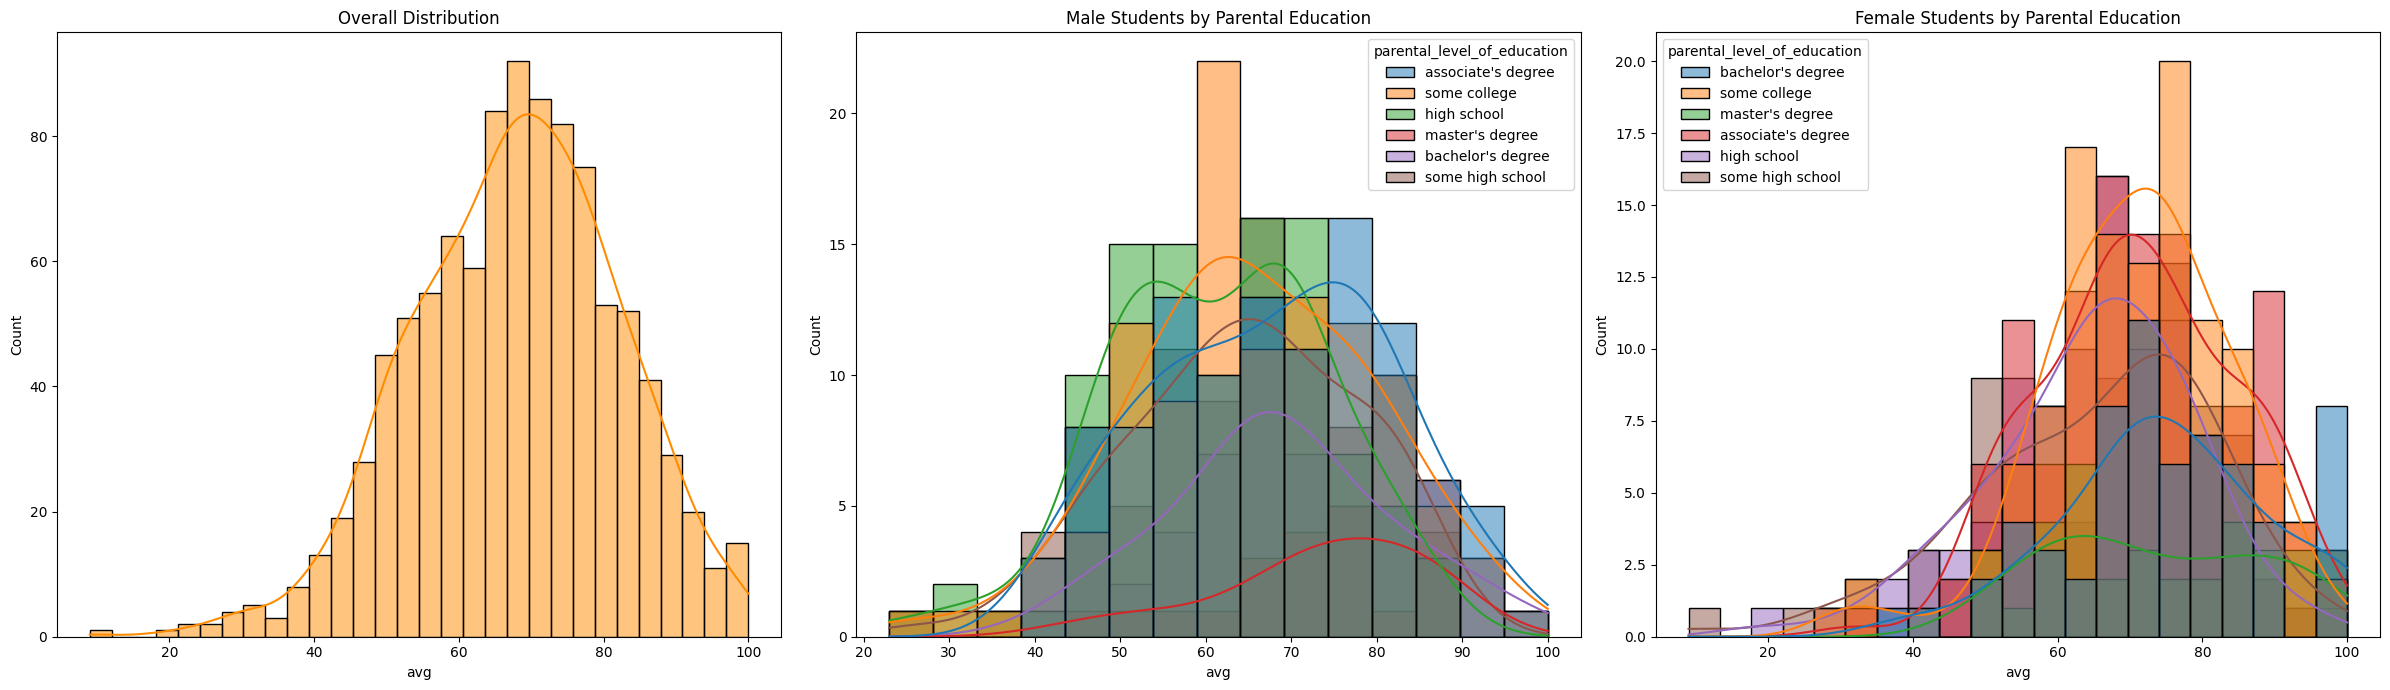

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 7))

sns.histplot(
    x="avg",
    data=df,
    bins=30,
    kde=True,
    color="darkorange",
    ax=axes[0]
)
axes[0].set_title("Overall Distribution")


sns.histplot(
    df.query("gender == 'male'"),
    x="avg",
    kde=True,
    hue="parental_level_of_education",
    ax=axes[1]
)
axes[1].set_title("Male Students by Parental Education")


sns.histplot(
    df.query("gender == 'female'"),
    x="avg",
    kde=True,
    hue="parental_level_of_education",
    ax=axes[2]
)
axes[2].set_title("Female Students by Parental Education")

plt.tight_layout()
plt.show()


Insights:
female students does not has effect of parental education on their performance
and the parents who have master and associate's degree have children with better performance

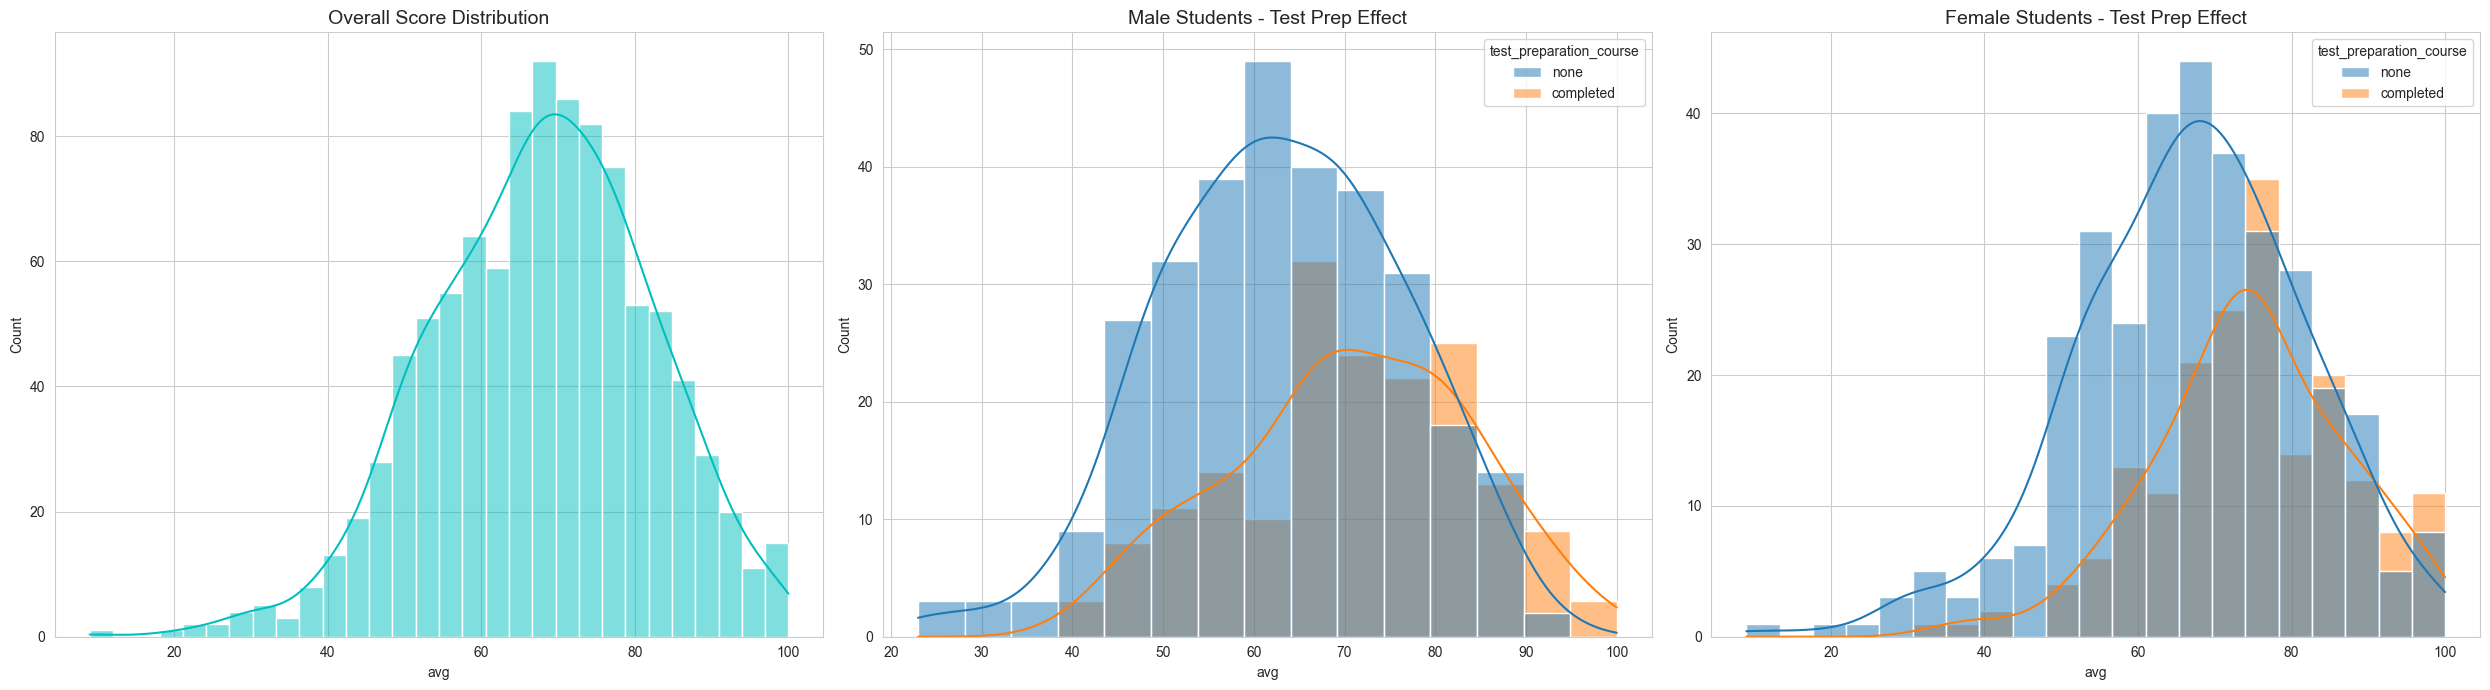

In [19]:
sns.set_style("whitegrid")

fig, axarr = plt.subplots(ncols=3, figsize=(25, 7))

sns.histplot(
    data=df,
    x="avg",
    bins=30,
    kde=True,
    color="c",
    ax=axarr[0]
)
axarr[0].set_title("Overall Score Distribution", fontsize=14)


sns.histplot(
    data=df.loc[df["gender"] == "male"],
    x="avg",
    kde=True,
    hue="test_preparation_course",
    ax=axarr[1]
)
axarr[1].set_title("Male Students - Test Prep Effect", fontsize=14)


sns.histplot(
    data=df.loc[df["gender"] == "female"],
    x="avg",
    kde=True,
    hue="test_preparation_course",
    ax=axarr[2]
)
axarr[2].set_title("Female Students - Test Prep Effect", fontsize=14)

plt.tight_layout()
plt.show()


the students who are comepeting in test course are performing well

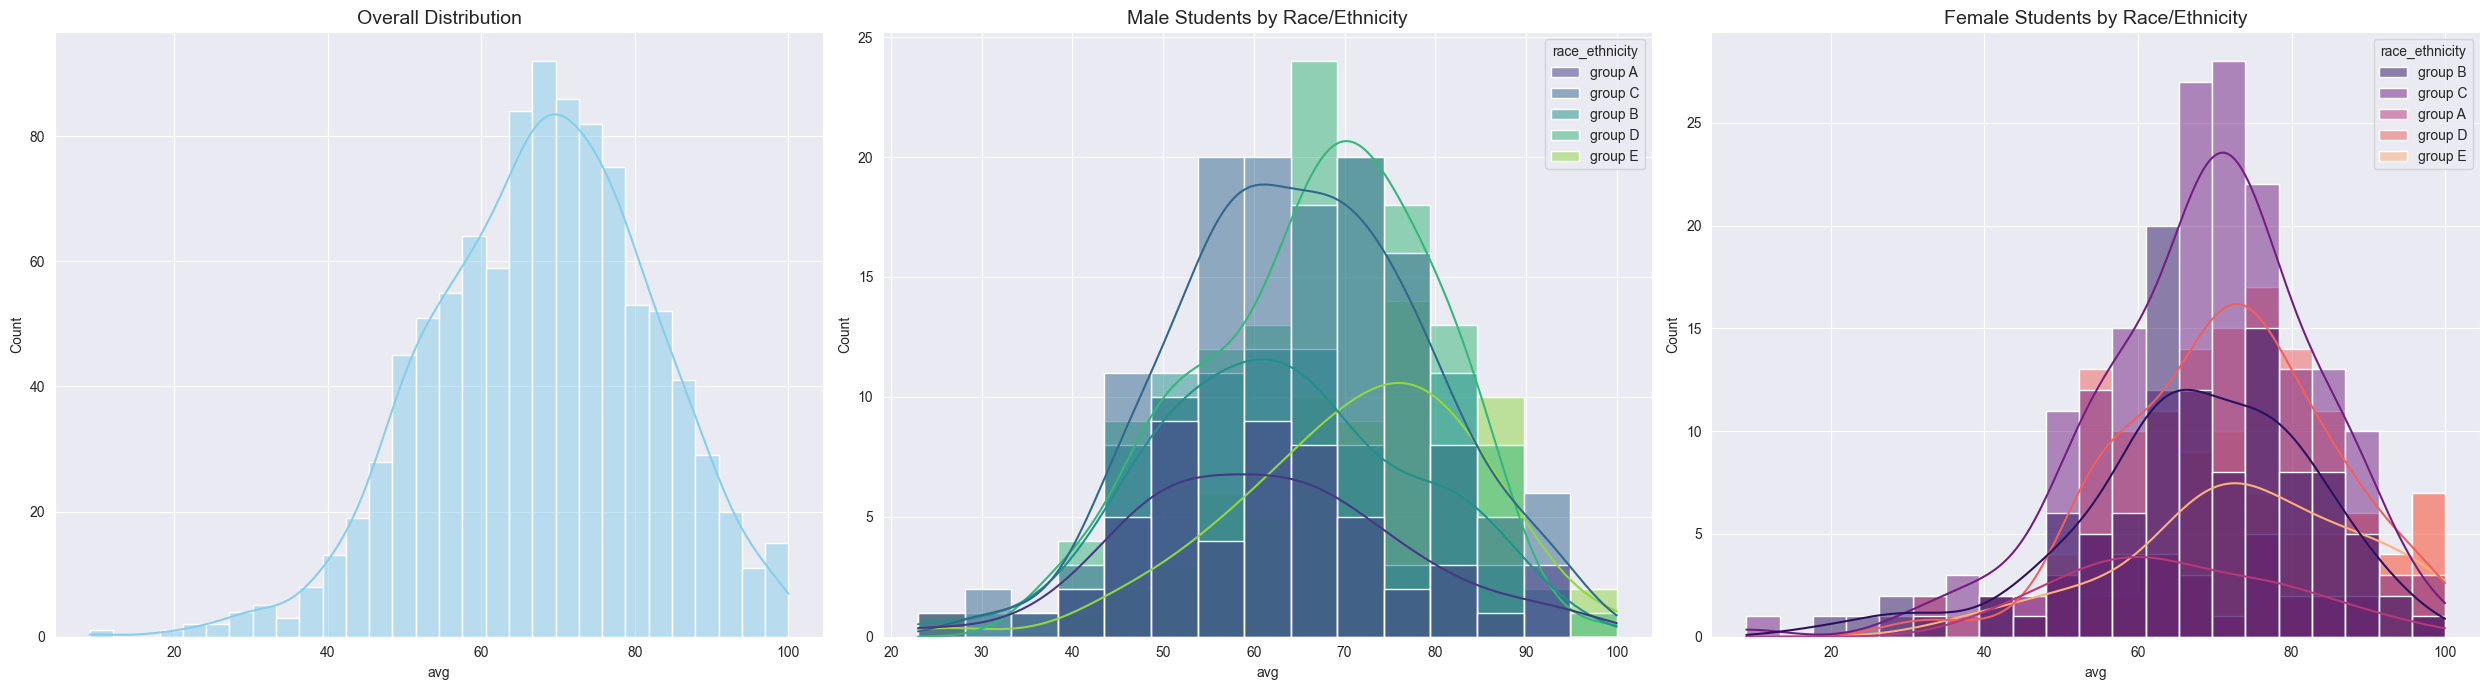

In [20]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(ncols=3, figsize=(25, 7))

sns.histplot(
    data=df,
    x="avg",
    bins=30,
    kde=True,
    color="skyblue",  
    ax=ax[0]
)
ax[0].set_title("Overall Distribution", fontsize=14)


sns.histplot(
    data=df.loc[df["gender"] == "male"],
    x="avg",
    kde=True,
    hue="race_ethnicity",
    palette="viridis",   
    ax=ax[1]
)
ax[1].set_title("Male Students by Race/Ethnicity", fontsize=14)

sns.histplot(
    data=df.loc[df["gender"] == "female"],
    x="avg",
    kde=True,
    hue="race_ethnicity",
    palette="magma",     
    ax=ax[2]
)
ax[2].set_title("Female Students by Race/Ethnicity", fontsize=14)

plt.tight_layout()
plt.show()


Max score of students in all three subjects

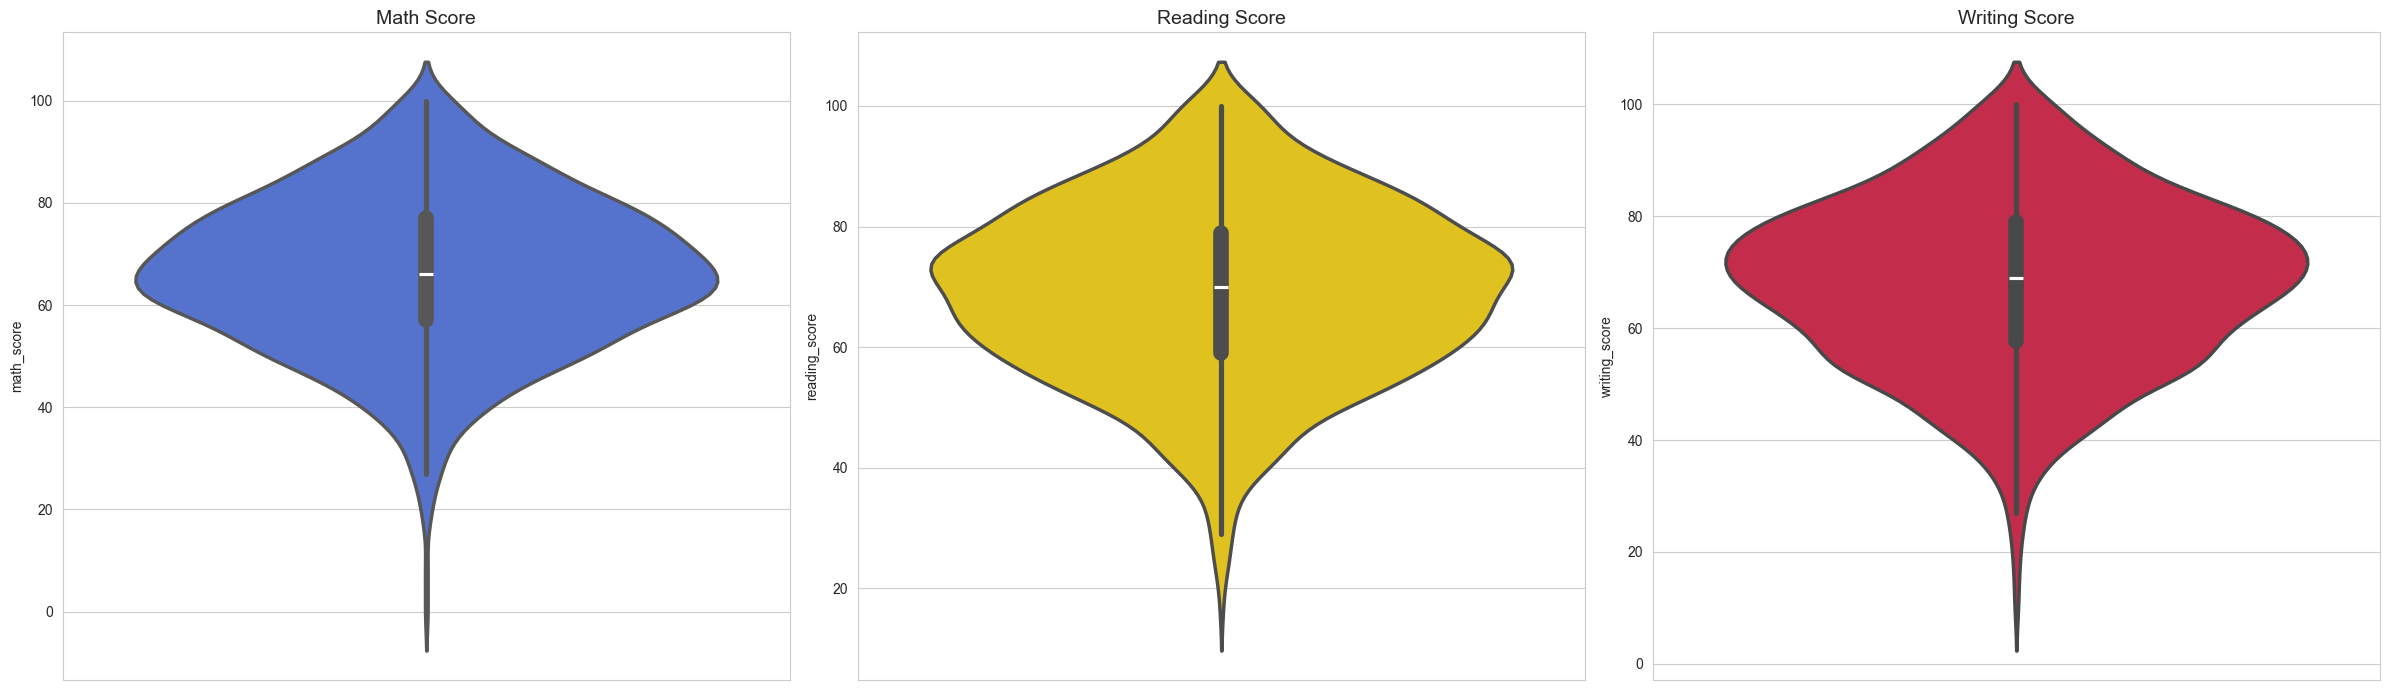

In [21]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(ncols=3, figsize=(24, 7))

sns.violinplot(
    data=df,
    y="math_score",
    color="royalblue",   
    linewidth=2.5,
    ax=axes[0]
)
axes[0].set_title("Math Score", fontsize=14)


sns.violinplot(
    data=df,
    y="reading_score",
    color="gold",        
    linewidth=2.5,
    ax=axes[1]
)
axes[1].set_title("Reading Score", fontsize=14)

sns.violinplot(
    data=df,
    y="writing_score",
    color="crimson",    
    linewidth=2.5,
    ax=axes[2]
)
axes[2].set_title("Writing Score", fontsize=14)

plt.tight_layout()
plt.show()


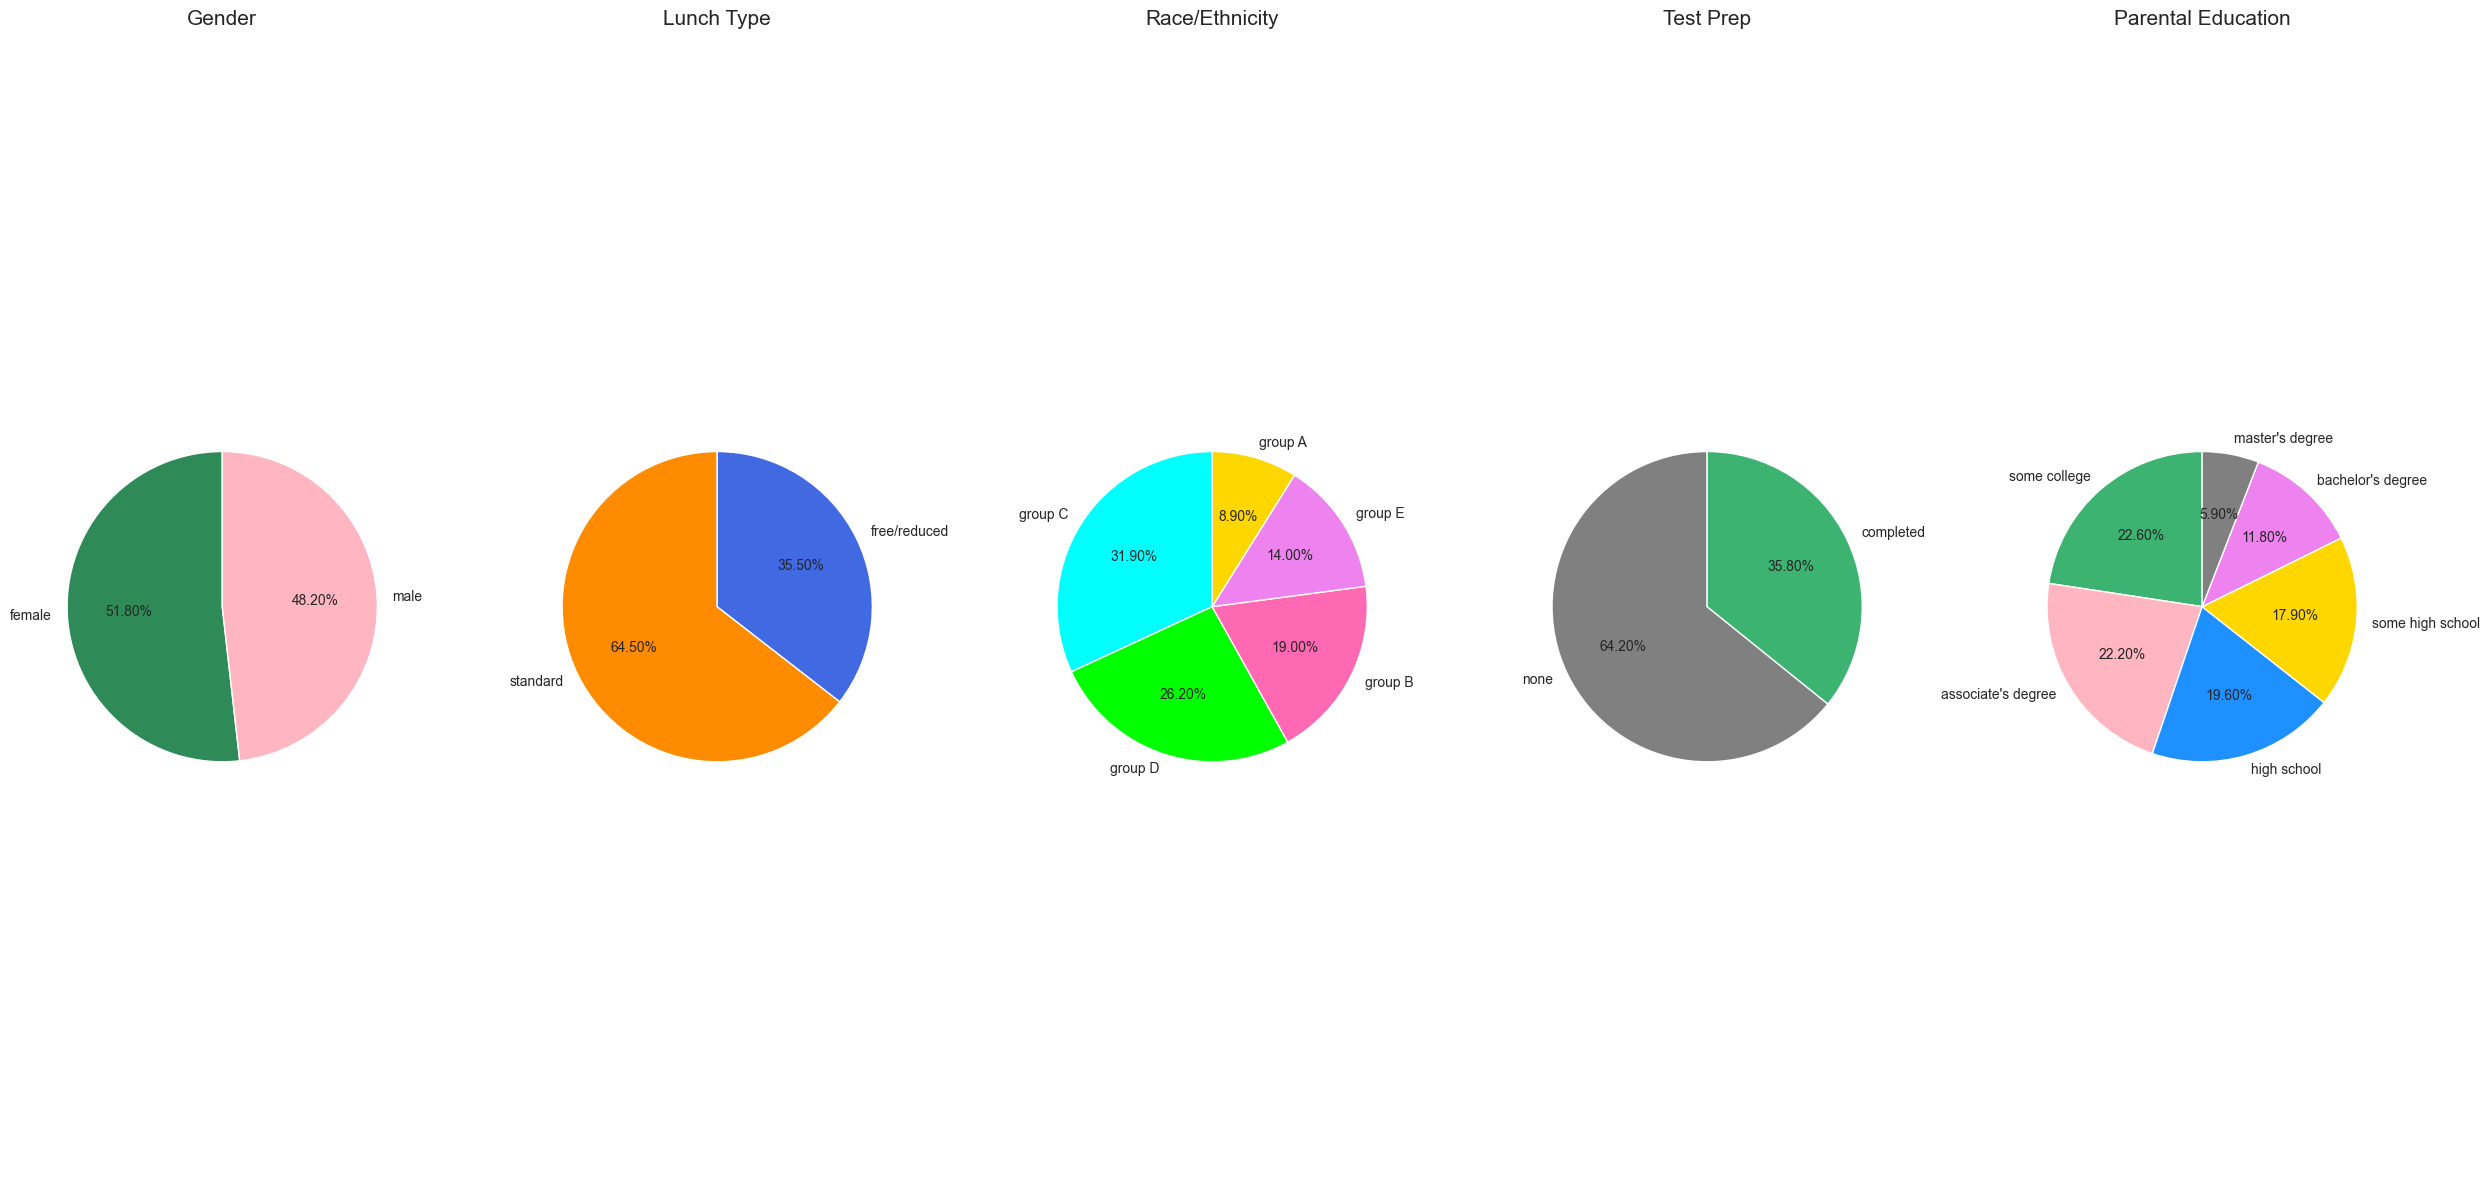

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 12))


gender_counts = df['gender'].value_counts()
axes[0].pie(
    gender_counts,
    labels=gender_counts.index,
    colors=['seagreen', 'lightpink'],  
    autopct='%.2f%%',
    startangle=90
)
axes[0].set_title("Gender", fontsize=15)
axes[0].axis('equal')  


lunch_counts = df['lunch'].value_counts()
axes[1].pie(
    lunch_counts,
    labels=lunch_counts.index,
    colors=['darkorange', 'royalblue'],
    autopct='%.2f%%',
    startangle=90
)
axes[1].set_title("Lunch Type", fontsize=15)
axes[1].axis('equal')


race_counts = df['race_ethnicity'].value_counts()
axes[2].pie(
    race_counts,
    labels=race_counts.index,
    colors=['cyan', 'lime', 'hotpink', 'violet', 'gold'],
    autopct='%.2f%%',
    startangle=90
)
axes[2].set_title("Race/Ethnicity", fontsize=15)
axes[2].axis('equal')


prep_counts = df['test_preparation_course'].value_counts()
axes[3].pie(
    prep_counts,
    labels=prep_counts.index,
    colors=['grey', 'mediumseagreen'],
    autopct='%.2f%%',
    startangle=90
)
axes[3].set_title("Test Prep", fontsize=15)
axes[3].axis('equal')

parent_counts = df['parental_level_of_education'].value_counts()
axes[4].pie(
    parent_counts,
    labels=parent_counts.index,
    colors=['mediumseagreen','lightpink','dodgerblue','gold','violet','grey'],
    autopct='%.2f%%',
    startangle=90
)
axes[4].set_title("Parental Education", fontsize=15)
axes[4].axis('equal')

plt.tight_layout()
plt.show()


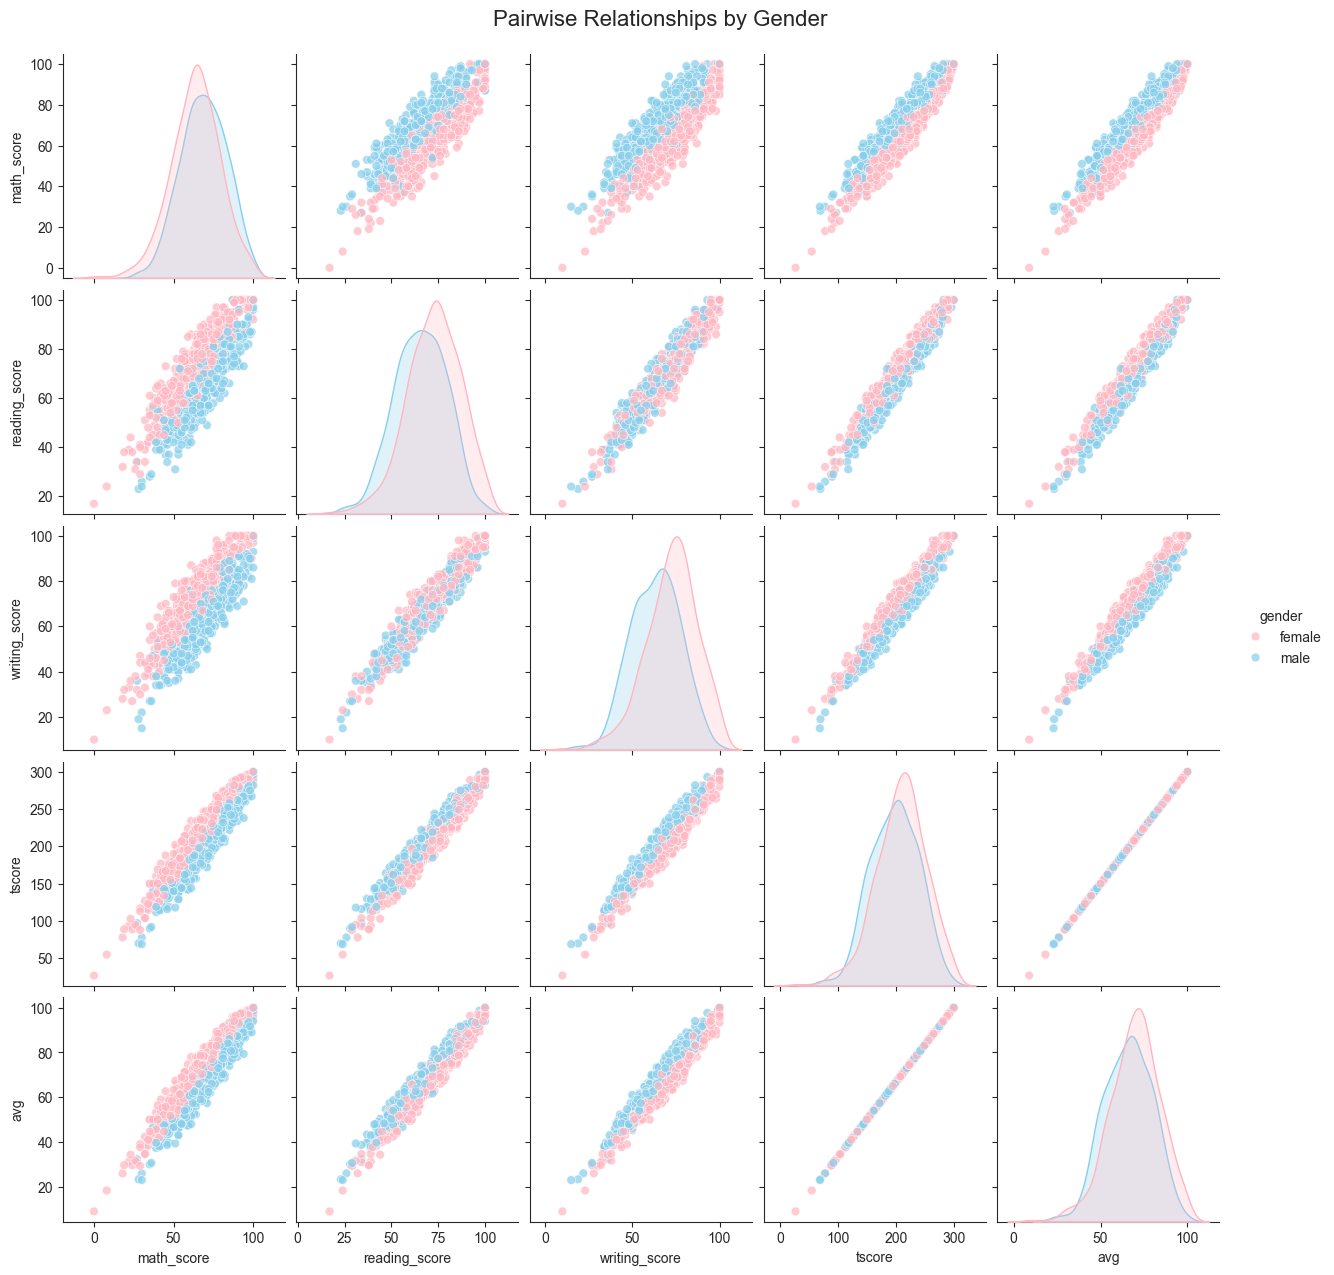

In [23]:
sns.set_style("ticks")


pair_plot = sns.pairplot(
    df, 
    hue="gender", 
    palette={"male": "skyblue", "female": "lightpink"},
    diag_kind="kde",        
    plot_kws={"alpha": 0.7, "s": 40}  
)

pair_plot.fig.suptitle("Pairwise Relationships by Gender", fontsize=16, y=1.02)
plt.show()


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,tscore,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
df.shape

(1000, 10)

In [27]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,tscore,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [28]:
X=df.drop(columns=['math_score'],axis=1)

In [29]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,tscore,avg
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,71,65,195,65.000000
998,female,group D,some college,standard,completed,78,77,223,74.333333


In [30]:
y=df['math_score']

In [31]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [32]:
num_fea=X.select_dtypes(exclude="object").columns
cat_fea=X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

n_t=StandardScaler()
o_t=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",o_t,cat_fea),
        ("StandardScaler",n_t,num_fea),
    ]
)

In [33]:
X=preprocessor.fit_transform(X)

In [34]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.39149181,
         0.34357423,  0.34357423],
       [ 1.        ,  0.        ,  0.        , ...,  1.31326868,
         1.0219275 ,  1.0219275 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.64247471,
         1.74706375,  1.74706375],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.20107904,
        -0.19443008, -0.19443008],
       [ 1.        ,  0.        ,  0.        , ...,  0.58901542,
         0.46053169,  0.46053169],
       [ 1.        ,  0.        ,  0.        , ...,  1.18158627,
         1.06871048,  1.06871048]], shape=(1000, 21))

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
X_train.shape,X_test.shape

((800, 21), (200, 21))

In [36]:
def evaluate_model(true,pred):
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    rmse=np.sqrt(mean_squared_error(true,pred))
    r2=r2_score(true,pred)
    return mae,rmse,mse,r2

In [37]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "CatBoostingRegressor":CatBoostRegressor(verbose=False)
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    train_mae,train_rmse,train_mse,train_r2=evaluate_model(y_train,y_train_pred)
    
    test_mae,test_rmse,test_mse,test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Models Performance for Training Set')
    print("Root mean square error: {:.4f}".format(train_rmse))
    print("Mean Absolute Error: {:.4f}".format(train_mae))
    print(" R2 Score: {:.4f}".format(train_r2))

    print("###############################################")

    print('Models Performance for Test Set')
    print("Root mean square error: {:.4f}".format(test_rmse))
    print("Mean Absolute Error: {:.4f}".format(test_mae))
    print(" R2 Score: {:.4f}".format(test_r2))
    r2_list.append(test_r2)

    print('='*35)
    print('\n')




LinearRegression
Models Performance for Training Set
Root mean square error: 0.0000
Mean Absolute Error: 0.0000
 R2 Score: 1.0000
###############################################
Models Performance for Test Set
Root mean square error: 0.0000
Mean Absolute Error: 0.0000
 R2 Score: 1.0000


Lasso
Models Performance for Training Set
Root mean square error: 4.7381
Mean Absolute Error: 3.7439
 R2 Score: 0.9004
###############################################
Models Performance for Test Set
Root mean square error: 4.7171
Mean Absolute Error: 3.7579
 R2 Score: 0.9086


Ridge
Models Performance for Training Set
Root mean square error: 0.3396
Mean Absolute Error: 0.2724
 R2 Score: 0.9995
###############################################
Models Performance for Test Set
Root mean square error: 0.3432
Mean Absolute Error: 0.2684
 R2 Score: 0.9995


KNeighborsRegressor
Models Performance for Training Set
Root mean square error: 4.2791
Mean Absolute Error: 3.3838
 R2 Score: 0.9188
######################

In [38]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model name,R2_Score
0,LinearRegression,1.000000
2,Ridge,0.999516
6,XGBRegressor,0.977101
8,CatBoostingRegressor,0.968100
5,Random Forest,0.962638
4,Decision Tree,0.937679
7,AdaBoostRegressor,0.923861
1,Lasso,0.908560
3,KNeighborsRegressor,0.889781


In [39]:
lg =LinearRegression()
lg = lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
score = r2_score(y_test, y_pred)
print("Accuracy is : %.2f" % score)

Accuracy is : 1.00


Text(0, 0.5, 'Predicted Values')

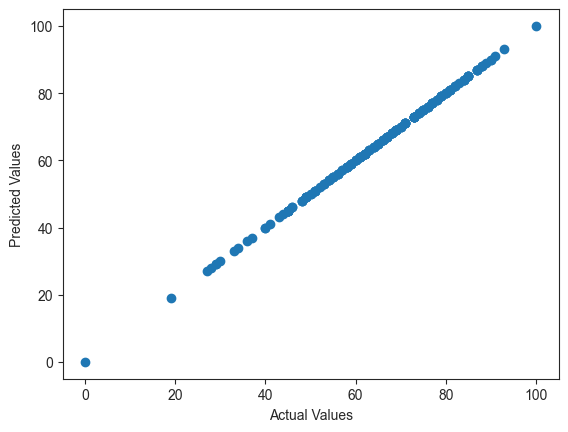

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

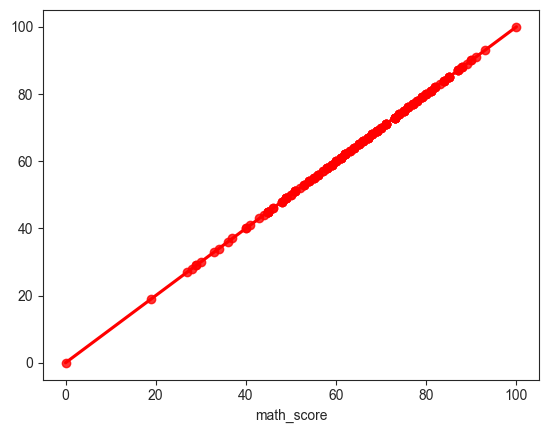

In [41]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

In [42]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Differnce':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Differnce
521,91,91.0,-2.131628e-13
737,53,53.0,5.684342e-14
740,80,80.0,-7.105427e-14
660,74,74.0,-5.684342e-14
411,84,84.0,-1.421085e-13
...,...,...,...
408,52,52.0,1.705303e-13
332,62,62.0,1.350031e-13
208,74,74.0,-9.947598e-14
613,65,65.0,-7.105427e-14
